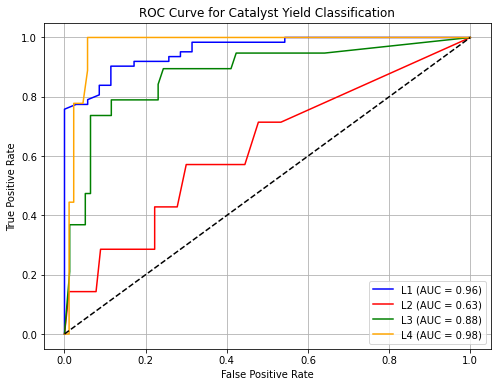

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

exercise = pd.read_csv("data_encoded_adjust_removenone _03.csv")

X = exercise.drop(columns=['class'])
y = exercise['class']

y_bin = label_binarize(y, classes=[1, 2, 3, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=0)

model = OneVsRestClassifier(RandomForestClassifier(random_state=0))
model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green', 'orange']
labels = ['L1', 'L2', 'L3', 'L4']

for i in range(4):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Catalyst Yield Classification')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()
